# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

>This is prepared for Udacity Machine Learning Engineer Nanodegree online class  
Author: jtmoogle @github.com All Rights Reserved  
Date: Aug 19, 2017

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. 
- One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. 
- Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

>The following steps were performed  
1. Data Exploration  
    - Implementation: Selecting Samples  
    - Implementation: Feature Relevance
    - Visualize Feature Distributions  
2. Data Preprocessing  
    - Implementation: Feature Scaling  
    - Observation  
    - Implementation: Outlier Detection
3. Feature Transformation  
    - Implementation: PCA  
    - Observation
    - Implementation: Dimensionality Reduction  
    - Observation  
4. Visualizing a Biplot  
    - Observation  
5. Clustering
    - Implementation: Creating Clusters  - Cluster Visualization  
    - Implementation: Data Recovery  
6. Conclusion 
    - Visualizing Underlying Distributions

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
#1-------------
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import sys 
from platform import python_version
print( '--> sys version= {} '.format(sys.version ))
print( '--> python version= {}'.format(python_version()))

debug=False; fyi=True;   #FYI only

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    print( '--> debug mode={}  fyi mode={}'.format( debug,fyi) )
    if debug: display('-Data dtype->', data.dtypes)
    if fyi: 
        print('Data length={}  data shape={}'.format(len(data), data.shape))
        print('Data column={}'.format(data.columns.tolist())) 
    # Success - Display the first record
    print('\nData first record -->')
    display('  before dropping columns->', data.head(n=1))  

    data.drop(['Region', 'Channel'], axis = 1, inplace = True)   #drop column
    display('  after dropping columns->', data.head(n=1))
    print "\nWholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

--> sys version= 2.7.13 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)] 
--> python version= 2.7.13
--> debug mode=False  fyi mode=True
Data length=440  data shape=(440, 8)
Data column=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

Data first record -->


'  before dropping columns->'

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338


'  after dropping columns->'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338



Wholesale customers dataset has 440 samples with 6 features each.


## 1. Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
#2-------------
# Display a description of the dataset
summary=data.describe()
display('-Data Summary->', np.round( summary, 2))
display( '  Mean=Average & Median=50% percentile -> ', np.round(summary.loc[['mean','50%']],2))

'-Data Summary->'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


'  Mean=Average & Median=50% percentile -> '

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.3,5796.27,7951.28,3071.93,2881.49,1524.87
50%,8504.0,3627.00,4755.50,1526.00,816.50,965.50


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#-----
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

def get_sampledata(indices): 
    '''
    inputs: indices: indices indicating location of customer data
    output: df: return dataframe of chosen samples
    '''    
    # Create a DataFrame of the chosen samples
    samples = pd.DataFrame( data.loc[indices], columns = data.keys()).reset_index(drop = True)
    print( '--Chosen samples of wholesale customers dataset ----> indices={} '.format(indices))
    display(samples)
    return (samples)

def get_percentile(indices):
    '''
    inputs: indices: indices indicating location of customer data
    output: df: return dataframe of percentile result for the chosen samples
    '''    
    print('--Results of percentile -> % ')    
    percentile_result = (np.round( 100 * data.rank(axis=0, pct=True).iloc[indices], 2))
    display(percentile_result)
    return (percentile_result)

def compared_mean_median( samples ) :
    '''
    inputs: sample of customer data
    output: none
    '''    
    print "--Sample compared to the mean/average -> "
    display(samples - data.mean().round())
    print "--Sample compared to the median/50% -> "
    display(samples - data.median().round())
    return


In [4]:
#3.sample1-------------
import random

# Select three indices of your choice you wish to sample from the dataset
random.seed(99)
x = range(len(data))
sample1_idx = random.sample( x, 3)
sample1 = get_sampledata ( sample1_idx )
sample1_percentile = get_percentile( sample1_idx )
compared_mean_median( sample1 )

--Chosen samples of wholesale customers dataset ----> indices=[177, 88, 78] 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12759,7330,4533,1752,20,2631
1,7864,542,4042,9735,165,46
2,10766,1175,2067,2096,301,167


--Results of percentile -> % 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
177,67.05,75.91,47.95,54.09,1.93,87.27
88,47.95,3.86,45.91,94.55,14.55,3.30
78,58.86,17.95,23.41,58.86,28.64,9.55


--Sample compared to the mean/average -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,759.0,1534.0,-3418.0,-1320.0,-2861.0,1106.0
1,-4136.0,-5254.0,-3909.0,6663.0,-2716.0,-1479.0
2,-1234.0,-4621.0,-5884.0,-976.0,-2580.0,-1358.0


--Sample compared to the median/50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4255.0,3703.0,-223.0,226.0,-796.0,1665.0
1,-640.0,-3085.0,-714.0,8209.0,-651.0,-920.0
2,2262.0,-2452.0,-2689.0,570.0,-515.0,-799.0


In [5]:
#3.sample2-------------
sample2_idx = random.sample( x, 3)
sample2 = get_sampledata ( sample2_idx )
sample2_percentile = get_percentile( sample2_idx )
compared_mean_median( sample2 )

--Chosen samples of wholesale customers dataset ----> indices=[109, 334, 110] 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1406,16729,28986,673,836,3
1,16823,928,2743,11559,332,3486
2,11818,1648,1694,2276,169,1647


--Results of percentile -> % 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,12.73,94.77,97.27,24.32,51.36,0.57
334,74.77,12.27,34.32,96.36,30.68,92.95
110,63.64,26.82,17.05,61.14,15.23,71.59


--Sample compared to the mean/average -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-10594.0,10933.0,21035.0,-2399.0,-2045.0,-1522.0
1,4823.0,-4868.0,-5208.0,8487.0,-2549.0,1961.0
2,-182.0,-4148.0,-6257.0,-796.0,-2712.0,122.0


--Sample compared to the median/50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-7098.0,13102.0,24230.0,-853.0,20.0,-963.0
1,8319.0,-2699.0,-2013.0,10033.0,-484.0,2520.0
2,3314.0,-1979.0,-3062.0,750.0,-647.0,681.0


In [6]:
#3.sample3-------------
sample3_idx = random.sample( x, 3)
sample3 = get_sampledata ( sample3_idx )
sample3_percentile = get_percentile( sample3_idx )
compared_mean_median( sample3 )

--Chosen samples of wholesale customers dataset ----> indices=[168, 301, 236] 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5809,735,803,1393,79,429
1,5283,13316,20399,1809,8752,172
2,8635,820,3047,2312,415,225


--Results of percentile -> % 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
168,37.73,7.50,5.00,47.50,7.50,26.14
301,35.45,92.27,92.05,55.91,92.27,9.77
236,51.14,8.41,37.95,62.05,37.05,12.84


--Sample compared to the mean/average -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-6191.0,-5061.0,-7148.0,-1679.0,-2802.0,-1096.0
1,-6717.0,7520.0,12448.0,-1263.0,5871.0,-1353.0
2,-3365.0,-4976.0,-4904.0,-760.0,-2466.0,-1300.0


--Sample compared to the median/50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2695.0,-2892.0,-3953.0,-133.0,-737.0,-537.0
1,-3221.0,9689.0,15643.0,283.0,7936.0,-794.0
2,131.0,-2807.0,-1709.0,786.0,-401.0,-741.0


Compare Sample annual spending in m.u.


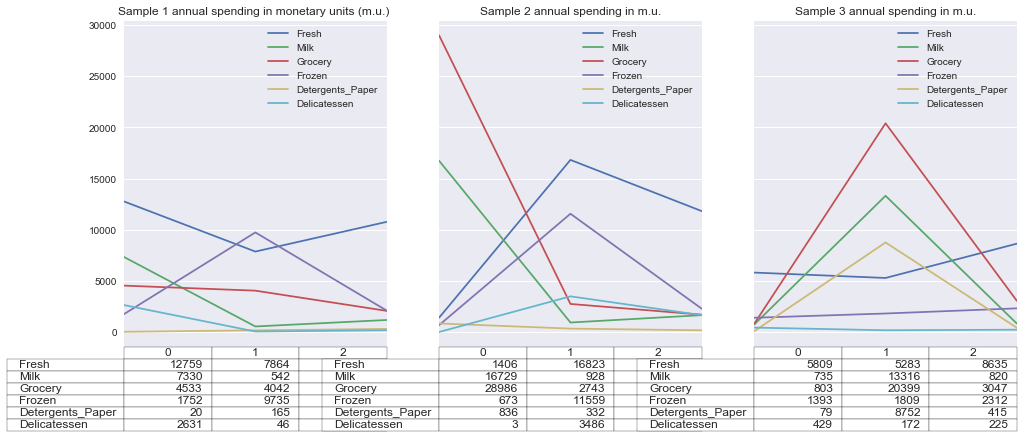

In [7]:
#3.1---- visual comparison of sample dataset    
plt.close('defaultplot')
print('Compare Sample annual spending in m.u.')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True)
ax1.set_title( 'Sample 1 annual spending in monetary units (m.u.) ' )
ax1.get_xaxis().set_visible(False)
ax2.set_title( 'Sample 2 annual spending in m.u.' )
ax2.get_xaxis().set_visible(False)
ax3.set_title( 'Sample 3 annual spending in m.u.' )
ax3.get_xaxis().set_visible(False)
sample1.plot(ax=ax1, figsize=( 16, 6), table=True )
sample2.plot(ax=ax2, figsize=( 16, 6), table=True)
sample3.plot(ax=ax3, figsize=( 16, 6), table=True )
plt.show()
plt.close()

Compare Sample annual spending in m.u.


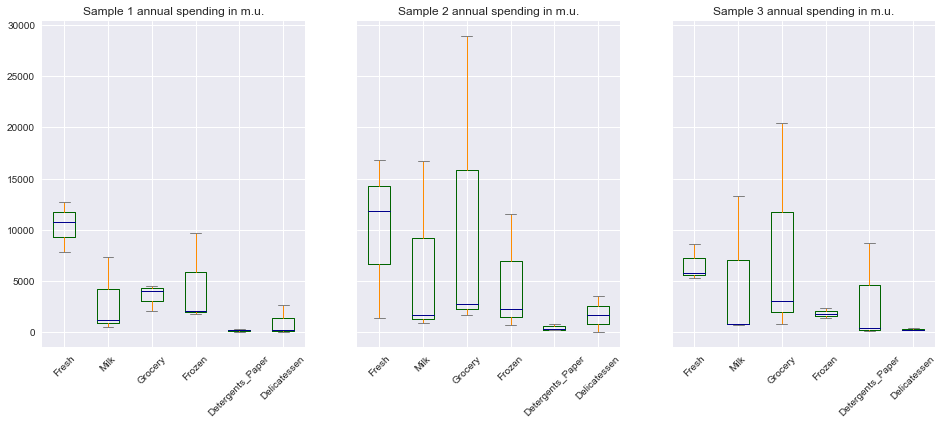

In [8]:
#3.2---- visual comparison of sample dataset    
print('Compare Sample annual spending in m.u.')
plt.close('boxplot')
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, sharex=False, sharey=True)
ax1.set_title( 'Sample 1 annual spending in m.u.' )
ax2.set_title( 'Sample 2 annual spending in m.u.' )
ax3.set_title( 'Sample 3 annual spending in m.u.' )
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
sample1.plot.box( ax=ax1, figsize=( 16, 6), color=color, sym='r+')    
sample2.plot.box( ax=ax2, figsize=( 16, 6), color=color, sym='r+')    
sample3.plot.box( ax=ax3, figsize=( 16, 6), color=color, sym='r+') 
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.show()
plt.close()


Compare Sample Percentile Result


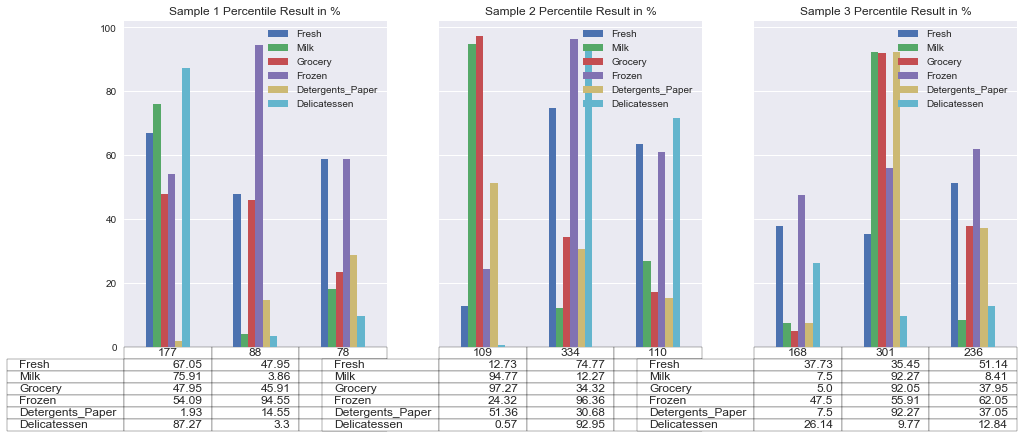

In [9]:
plt.close('barplot')
print('Compare Sample Percentile Result')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True)
ax1.set_title( 'Sample 1 Percentile Result in %' )
ax1.get_xaxis().set_visible(False)
ax2.set_title( 'Sample 2 Percentile Result in %' )
ax2.get_xaxis().set_visible(False)
ax3.set_title( 'Sample 3 Percentile Result in %' )
ax3.get_xaxis().set_visible(False)
sample1_percentile.plot(ax=ax1, kind='bar', figsize=( 16, 6), table=True )
sample2_percentile.plot(ax=ax2, kind='bar', figsize=( 16, 6), table=True)
sample3_percentile.plot(ax=ax3, kind='bar', figsize=( 16, 6), table=True )
plt.show()
plt.close()

Compare Sample annual spending percentile %


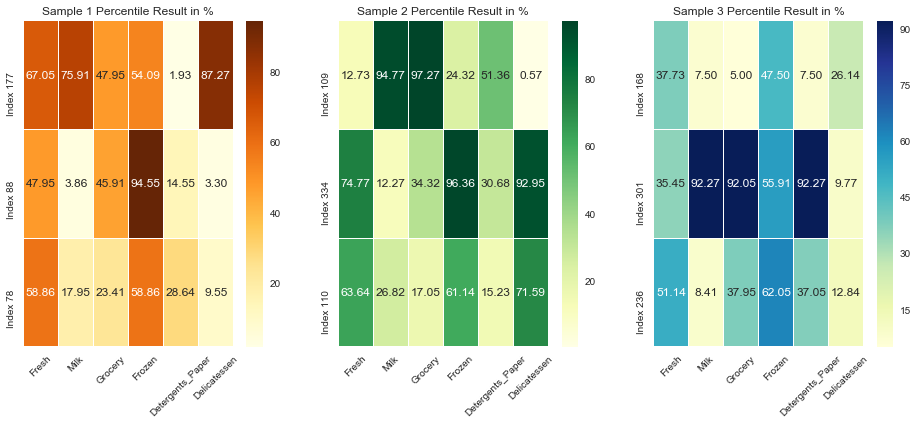

In [10]:
#3.3---- visual heatmap comparison of sample dataset   
import seaborn as sns    
print('Compare Sample annual spending percentile %')
fig, (ax1, ax2, ax3)= plt.subplots( 1,3, figsize=( 16, 6), sharex=False, sharey=False)
ax1.set_title( 'Sample 1 Percentile Result in %' )
ax2.set_title( 'Sample 2 Percentile Result in %' )
ax3.set_title( 'Sample 3 Percentile Result in %' )
sns.heatmap(sample1_percentile, ax=ax1,  yticklabels=['Index ' + str(x) for x in sample1_idx], 
            annot=True, linewidth=0.3, fmt='.2f',  cmap='YlOrBr')
sns.heatmap(sample2_percentile, ax=ax2,  yticklabels=['Index '+str(x) for x in sample2_idx], 
            annot=True, linewidth=.3,  fmt='.2f', cmap='YlGn' )
sns.heatmap( sample3_percentile, ax=ax3, yticklabels=['Index '+str(x) for x in sample3_idx], 
            annot=True, linewidth=.3,  fmt='.2f', cmap='YlGnBu')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.show()
plt.close()


Raw Data Mean & Median=50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.3,5796.27,7951.28,3071.93,2881.49,1524.87
50%,8504.0,3627.00,4755.50,1526.00,816.50,965.50


Chosen sample 2 as my samples of wholesale customers dataset:
Sample2 Data ->


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1406,16729,28986,673,836,3
1,16823,928,2743,11559,332,3486
2,11818,1648,1694,2276,169,1647


--Sample compared to the mean/average -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-10594.0,10933.0,21035.0,-2399.0,-2045.0,-1522.0
1,4823.0,-4868.0,-5208.0,8487.0,-2549.0,1961.0
2,-182.0,-4148.0,-6257.0,-796.0,-2712.0,122.0


--Sample compared to the median/50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-7098.0,13102.0,24230.0,-853.0,20.0,-963.0
1,8319.0,-2699.0,-2013.0,10033.0,-484.0,2520.0
2,3314.0,-1979.0,-3062.0,750.0,-647.0,681.0


Sample Percentile in % -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,12.73,94.77,97.27,24.32,51.36,0.57
334,74.77,12.27,34.32,96.36,30.68,92.95
110,63.64,26.82,17.05,61.14,15.23,71.59


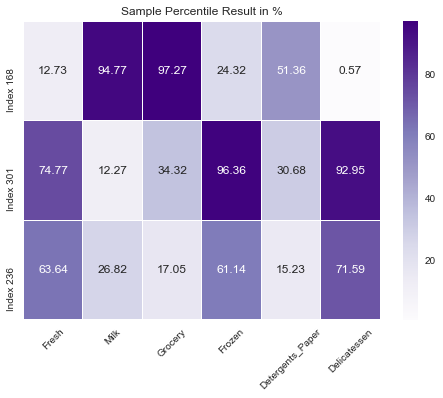

In [11]:
#3.4 -- decided to choose sample 2 for my sample
#  Select three indices of your choice you wish to sample from the dataset
print ('\nRaw Data Mean & Median=50% -> ')
display( np.round(summary.loc[['mean','50%']],2))

sample_loc_idx = sample2_idx
samples = sample2
sample_percentile = sample2_percentile
print ('Chosen sample 2 as my samples of wholesale customers dataset:\nSample2 Data ->')
display( samples )
compared_mean_median( samples )

print( 'Sample Percentile in % -> ')
display( sample_percentile )
plt.title( 'Sample Percentile Result in %' )
sns.heatmap( sample_percentile, yticklabels=['Index '+str(x) for x in sample3_idx], 
            annot=True, linewidth=.3,  fmt='.2f', cmap='Purples')
plt.xticks(rotation=45)
plt.show()
plt.close()


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

>**Answer:**  
I randomly chose 3 different sets of sample data points, observed descriptive statistics, and compared result.

>The visual heat map comparison annual spending percentile %.  Note: the <b>bolded percentile</b> if above median/50% percentile.
>- Sample 1 annual spent percentile

| | Index | Fresh | Milk| Grocery| Frozen | Detergents Paper | Delicatessen | 
| -- | -- | -- | -- | -- | -- | -- | 
| 1st sample customer | 177 | <b>67.05%</b> | <b>75.91%</b> | 47.95% | <b>54.09%</b> | 1.93% | <b>87.27%</b>  | 
| 2nd  | 88 | 47.95%  |  3.86%  |  45.91%  |  <b>94.55%</b>  | 14.55%  |  3.30%  | 
| 3rd  | 78 | <b>58.86%</b>  |  17.95%  |  23.41%  |  <b>58.86%</b>   | 28.64%  |  9.55%   | 
>- Sample 2 annual spent percentile

| | Index | Fresh | Milk| Grocery| Frozen | Detergents Paper | Delicatessen | 
| -- |-- | -- | -- | -- | -- | -- | 
| 1st  |109  | 12.73%  |  <b>94.77%</b>  |  <b>97.27%</b>  |  24.32%   | <b>51.36%</b>  |  0.57%  | 
| 2nd  |334| <b>74.77%</b>  |  12.27%  |  34.32%  | <b> 96.36%</b>  |  30.68%  |  <b>92.95%</b> | 
| 3rd  |110| <b>63.64%</b>  |  26.82%  |  17.05% |   <b>61.14%</b>  |  15.23% |  <b> 71.59%</b>   | 
>- Sample 3 annual spent percentile 

| | Index | Fresh | Milk| Grocery| Frozen | Detergents Paper | Delicatessen | 
| -- |-- | -- | -- | -- | -- | -- | 
| 1st  |168| 37.73%  |  7.50%   | 5.00%   | 47.50%  |  7.50%  |  26.14%  | 
| 2nd  |301| 35.45%  | <b> 92.27% </b> |  <b>92.05%</b>   | <b>55.91% </b> |  <b>92.27%</b> |   9.77%  | 
| 3rd  |236| <b>51.14%</b> |   8.41%  |  37.95%  | <b> 62.05%</b> |   37.05%  |  12.84%  | 

> In addition, compared difference between sample data and mean/average value of data.  Note: the <b>bolded value</b> if above mean/average value.
>- Sample 1 compared to the mean/average 

| | Index | Fresh | Milk| Grocery| Frozen | Detergents Paper | Delicatessen | 
| -- |-- | -- | -- | -- | -- | -- | 
|1st |177 |	<b>759.0 </b>| 	<b>1534.0</b>| 	-3418.0| 	-1320.0| 	-2861.0| 	<b>1106.0</b>| 
| 2nd |88 |	-4136.0| 	-5254.0	| -3909.0| 	<b>6663.0</b> | 	-2716.0	|-1479.0| 
| 3rd |78 |	-1234.0| 	-4621.0	| -5884.0| 	-976.0| 	-2580.0	|-1358.0| 
>- Sample 2 compared to the mean/average

| | Index | Fresh | Milk| Grocery| Frozen | Detergents Paper | Delicatessen | 
| -- |-- | -- | -- | -- | -- | -- | 
|1st |109 |	-10594.0| 	<b>10933.0</b> |<b> 21035.0</b> |	-2399.0	|-2045.0|	-1522.0|
| 2nd |334 |	<b>4823.0</b> | 	-4868.0	| -5208.0|	<b>8487.0</b> |	-2549.0	| <b>1961.0</b> |
| 3rd |110 |	-182.0| 	-4148.0	|-6257.0|	-796.0	|-2712.0	|<b>122.0</b>|
>- Sample 3 compared to the mean/average

| | Index | Fresh | Milk| Grocery| Frozen | Detergents Paper | Delicatessen | 
| -- |-- | -- | -- | -- | -- | -- | 
|1st |168|	-6191.0	|-5061.0	|-7148.0	|-1679.0	|-2802.0|	-1096.0|
| 2nd  |301|	-6717.0|<b>7520.0</b>|<b>12448.0</b>	|-1263.0	|<b>5871.0</b>	|-1353.0|
| 3rd  |110|	-3365.0	|-4976.0	|-4904.0|	-760.0	|-2466.0|	-1300.0|

> Observed heat map charts and comparison difference to the mean/average values, sample 2 and 3 had more feature over 90% percentiles, and above average values, so I assumed they were more significant than sample 1. 

> Chose **Sample 2** for my sample customers  
- First customer spent patterns
    + Above mean/average, the highest grocery > milk
    + Above 50% percentile, the most grocery > milk > detergent paper
    + Low spent were deli < fresh < frozen 
    + This could be the grocery store (i.e. target) selling grocery, milk, detergent paper.  
    + Or, this could be restaurants selling bakery/cake/fresh made meal/catering services.
- Second customer spent patterns
    + Above mean/average, the highest frozen > deli > fresh 
    + Above 50% percentile, the most frozen > fresh > deli 
    + Low spent feature was milk
    + This could be the food stores selling ready-to-cook/bake like organic refrigerated frozen foods, ready-to-eat like fresh deli, salad, cold-cut meat (i.e. chicken, turkey/ham etc.)
- Third customer spent patterns
    + Above mean/average, the highest deli > fresh > frozen 
    + Above 50% percentile, the most deli 
    + Low spent feature was detergent paper
    + This could be the fast-food shop selling counter-serve/made-to-order toasted sandwiches, salads & baked goods


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [29]:
#4-------------
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score

debug=False
scores = {}

print("The R^2 score for features are sorted the highest to lowest ")
for target_feature in data.columns.values:
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    target_data = data[target_feature]

    new_data = data.copy(deep=True)
    new_data.drop( [target_feature], axis= 1 , inplace = True) #drop column
    if debug: display( new_data.head(1))

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split (
        new_data, target_data, test_size = 0.25, random_state = 9)
    # Show the results of the split
    if debug: 
        print ("Training set has {} samples.".format(X_train.shape))
        print ("Testing set has {} samples.".format(X_test.shape))

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 9, max_depth=3, min_samples_leaf=5)
    if debug: print(regressor)
    regressor.fit( X_train, y_train)
    # this is the coefficient of determination R^2 of the prediction.
    scores[target_feature] = regressor.score(X_test, y_test)
    # alternative way to calculate R2 score
        # prediction = regressor.predict(X_test)
        # r2_scores[target_feature] = r2_score(y_test, prediction)

# sorted R2 scores, 1st row dispalys the highest; last row is lowest
akeys = sorted(scores, key=scores.get, reverse=True)
best_score = 0.0
best_feature = ''
for feature in akeys: 
    if best_score < scores[feature] : 
        best_score = scores[feature]
        best_feature = feature
    print(" {:20} {:+.4f} ".format(feature, scores[feature]))
print( '\n--> {} has the highest R2 score {:.4f}  '.format( best_feature, best_score) )

The R^2 score for features are sorted the highest to lowest 
 Grocery              +0.7422 
 Detergents_Paper     +0.6972 
 Milk                 +0.5513 
 Fresh                +0.0200 
 Delicatessen         -0.0111 
 Frozen               -0.5537 

--> Grocery has the highest R2 score 0.7422  


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

>**Answer:**   
The goal was to identify customers' spending habits.  The hint/guideline I followed were 
- Correlations showing feature dependence in a predictive relationship.   
    - R measures the degree of correlation. 
    - R2, R-squared, coefficient of determination, provides the information regarding the goodness of fit of a model.
        - if R2 score is positive, and closed to 1, the smaller Mean Squared Error(MSE) -> GOOD model
            - The model perfectly explained the observed feature
            - The model would fit to the data perfectly 
        - If R2 score is positive, and closed to 0, the larger MSE -> BAD model  
            - The model did not explain any variation
            - The model would not/highly fail fit to the data nicely, the data point hard to predict 
        - If R2 score is negative, the model would fail to fit to the data -> BAD model
        
>Which feature did you attempt to predict?   I attempted to drop each feature as target feature in my prediction model, and computed its R2 score accordingly.  Compared the scores for correlation, then chose the highest score:  

>``` 
The R^2 scores for a single feature were sorted the highest to lowest 
 Grocery              +0.7422 
 Detergents Paper     +0.6972 
 Milk                 +0.5513 
 Fresh                +0.0200 
 Delicatessen         -0.0111 
 Frozen               -0.5537 
```  

>- Features of *Grocery, Detergents Paper, and Milk* showed higher R2 score above 50%, indicating these features correlated, and somehow relevant for identifying customers' spending habits.  
- The 'Grocery' feature had the highest R2 score +0.7422 {over 70% explained variance), indicating this feature high correlated/relevant, and this could fit my model the best.  
    - Even we drop this feature, we would still be able to predict from the other features.  
    - So, the 'Grocery' feature would be my first choice NOT necessary for identifying customer's spending habit.     
- In addition, I would also explore others like Detergents Paper or/and Milk feature mixing NOT necessary for identifying customer's spending habit, if it would get better fitting.   
- The Deli, Frozen, Fresh had negative or close-to-zero R2 Scores implied that they are necessary for identify customer's spending habits

>Noted about the drawback: if using the high correlated variables (features) for prediction, even including additional irrelevant factors, R2 would never decrease as variables are added and would probably experience an increase due to chance alone.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Visualize Features in Scatter Matrix -> 


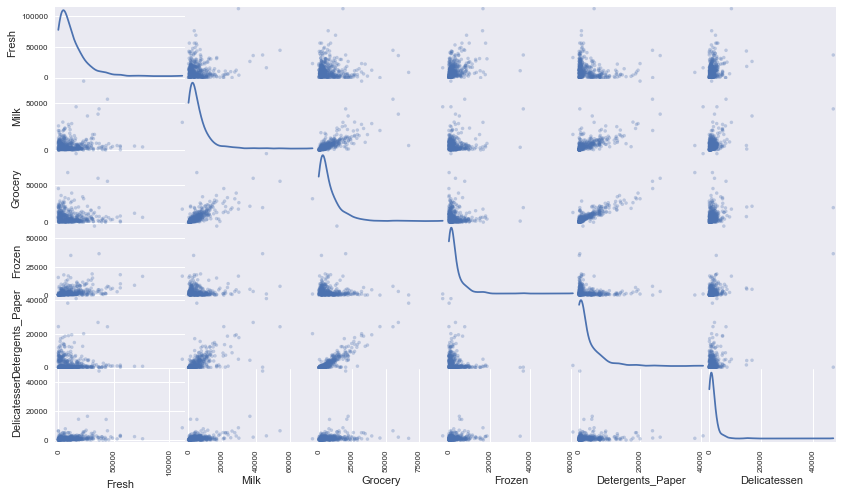

In [13]:
#5-------------
# Produce a scatter matrix for each pair of features in the data 
# old version: pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
print ('Visualize Features in Scatter Matrix -> ')
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie?  You can use corr() to get the feature correlations and then visualize them using a heatmap(the data that would be fed into the heatmap would be the correlation values, for eg: data.corr()) to gain further insight.

Visualize Features in Correlation Matrix->


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicatessen,0.24,0.41,0.21,0.39,0.07,1.00


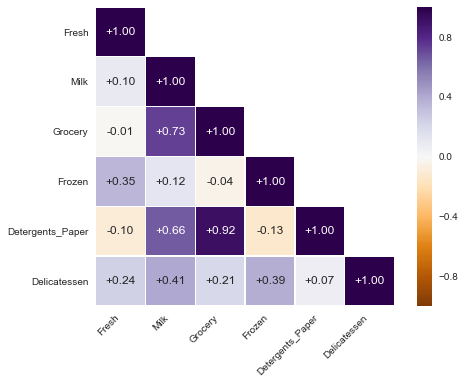

In [14]:
#5.1 Calculate correlation -----------------
import matplotlib.pyplot as plt
print('Visualize Features in Correlation Matrix->')
# get correlations
corr= np.round( data.corr(), 2)
display(corr)
# square matrix, using mask to show corr value symmetrically
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    sns.heatmap( corr, annot=True, linewidth=0.3, fmt='+.2f', cmap='PuOr', mask=mask, square=True)
plt.xticks(rotation=45, ha='right');
plt.show()

>**Answer:**  
Observed the following pairs exhibited some degree of correlation in scatter matrix, they has positive/ascending line, indicating linear correlated, from lower right to upper left.   
The pairs shown in the correlation matrix symmetrically, had higher correlation value than 0.50.  Listed them from the highest to lowest correlation value 

| Both Features | Correlation Value |  
| :--: |:--: |
| Detergent Paper and Grocery | 0.92 | 
| Grocery and Milk | 0.73 |  
| Detergent Paper and Milk | 0.66 |

>This confirmed my prior suspicions about relevant features like Grocery, Detergent Paper and Milk which I attempted above.  These three showed strong correlated, and Grocery had highest R2 score with detergent paper and milk

>The data distribution did NOT look like normal distribution, and few outliers sparkling presented.  It looked like skewed starting from the left lower value, and observed few outlier at higher values


## 2. Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

'After log-transformed, log_data Mean=Average & Median=50% -> '

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,8.73,8.12,8.44,7.30,6.79,6.67
50%,9.05,8.20,8.47,7.33,6.71,6.87


log_data in Correlation Matrix -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.00,-0.02,-0.13,0.38,-0.16,0.26
Milk,-0.02,1.00,0.76,-0.06,0.68,0.34
Grocery,-0.13,0.76,1.00,-0.16,0.80,0.24
Frozen,0.38,-0.06,-0.16,1.00,-0.21,0.25
Detergents_Paper,-0.16,0.68,0.80,-0.21,1.00,0.17
Delicatessen,0.26,0.34,0.24,0.25,0.17,1.00


Visualize log_data in Scatter Matrix -> 


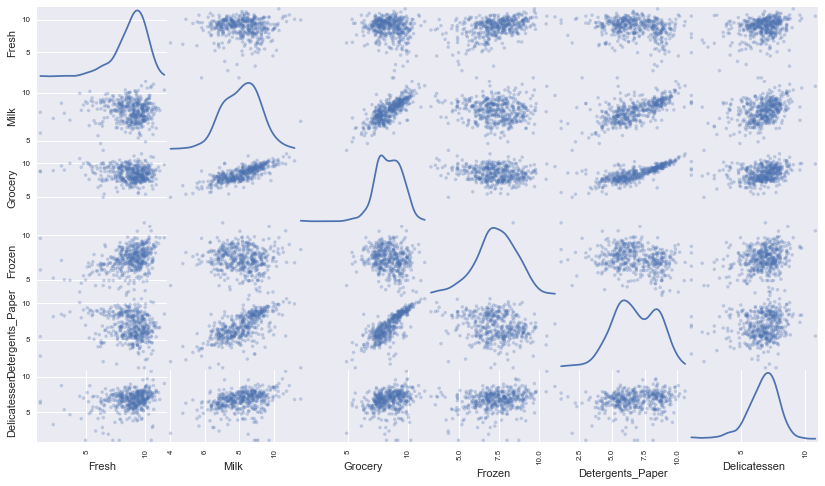

In [15]:
#6-------------
# Scale the data using the natural logarithm
log_data = data.copy(deep=True) 
log_data = np.log( log_data )
display( 'After log-transformed, log_data Mean=Average & Median=50% -> ', 
        np.round(log_data.describe().loc[['mean','50%']],2))
# get correlations
print( 'log_data in Correlation Matrix -> ')
log_corr= np.round( log_data.corr(), 2)
display( log_corr ) 

# Scale the sample data using the natural logarithm
log_samples = np.log( samples )

print ('Visualize log_data in Scatter Matrix -> ')
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [16]:
#6.1 -----------------
# Display the log-transformed sample data
print('samples indices= {}'.format( sample_loc_idx ))
display( ' samples data -> ', samples)
display('After log-transformed, log_samples data -> ', np.round(log_samples,2))

samples indices= [109, 334, 110]


' samples data -> '

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1406,16729,28986,673,836,3
1,16823,928,2743,11559,332,3486
2,11818,1648,1694,2276,169,1647


'After log-transformed, log_samples data -> '

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.25,9.72,10.27,6.51,6.73,1.10
1,9.73,6.83,7.92,9.36,5.81,8.16
2,9.38,7.41,7.43,7.73,5.13,7.41


Visualize comparing data and log_data in Correlation Matrix


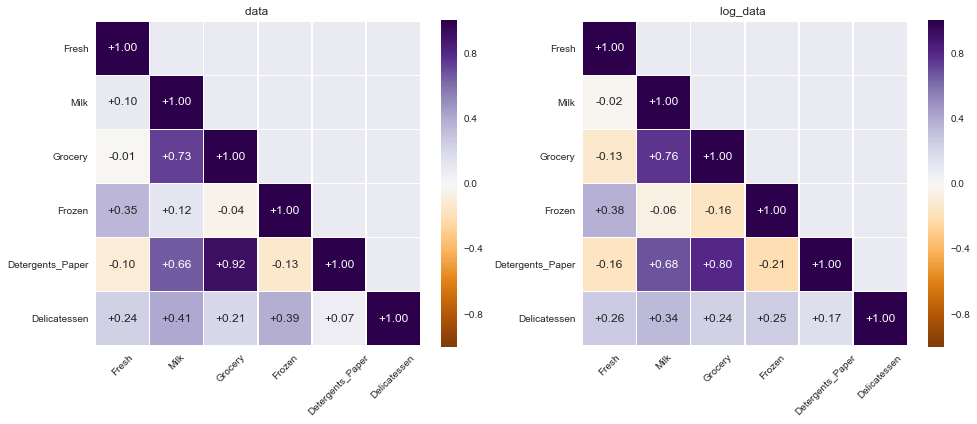

In [17]:
#6.2 -------------------
print('Visualize comparing data and log_data in Correlation Matrix')
fig, (ax1, ax2)= plt.subplots( 1,2, figsize=( 16, 6), sharex=False, sharey=False)
ax1.set_title( 'data ' )
ax2.set_title( 'log_data ' )
# symmetric visualization: dispaly one side only
with sns.axes_style("white"):
    sns.heatmap( corr, ax=ax1, annot=True, linewidth=0.3, fmt='+.2f', cmap='PuOr', mask=mask, square=True)
    sns.heatmap( log_corr, ax=ax2, annot=True, linewidth=0.3, fmt='+.2f', cmap='PuOr', mask=mask, square=True)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()
plt.close()

>**Log transform Changes** in correlations if any value above 0.5 

| Features in correlation abover 0.5 | Correlation Change | Value Change |  
| :--: | :--: | :--: |
| Detergent_Paper and Grocery | a weaker correlation | 0.92-> 0.80 | 
| Grocery and Milk | slightly stronger | 0.73-> 0.76 |  
| Detergent_Paper and Milk | slightly stronger | 0.66-> 0.68 |


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
#7-------------
from collections import Counter

outliers  = []
if fyi: print( 'Original log data size {}'.format( log_data.shape))

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile( log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile( log_data[feature], 75)
    
    # Compute interquartile range  IQR=Q3-Q1
    IQR = Q3 - Q1
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    # anything outside this range is an outlier
    step = 1.5 * IQR
    
    # Display the outliers
    print "\nData points considered outliers for the feature '{}'-->".format( feature )
    print( "  Q1={:.4f}   Q3={:4f}   step= 1.5*(Q3-Q1) = {:.4f} ".format(Q1, Q3, step))
    feature_outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    if debug: display( feature_outlier )
    else: print( '  This feature Outlier indices = {}'.format( list(feature_outlier.index.values ) ))
    outliers.extend( list(feature_outlier.index.values) )

# OPTIONAL: Select the indices for data points you wish to remove
#  if counter for the outlier found in which features, 
# if counter is > 1, consider duplicate feature.  Otherwise, expect 1 for each feature
duplicated_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
print( '\n\nOutliers for all features ={} '.format( sorted(outliers )) )
print( '\nNote: Also found duplicate outliers in multiple features ={} '.format( sorted(duplicated_feature_outliers ) ))

# Check if samples are in outliers
if np.any(sample_loc_idx == duplicated_feature_outliers): 
    print("\nWarning, my samples were in outliers")
else:
    print("\nConfirmation: My samples were not in outliers")
    
    # Remove the outliers, if any were specified                    
    good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    if fyi: print('\nRemoved duplicated outlier data -> good data -> data size={}'.format( good_data.shape ))
    good_data_colsize = good_data.shape[1]

Original log data size (440, 6)

Data points considered outliers for the feature 'Fresh'-->
  Q1=8.0481   Q3=9.737064   step= 1.5*(Q3-Q1) = 2.5335 
  This feature Outlier indices = [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]

Data points considered outliers for the feature 'Milk'-->
  Q1=7.3350   Q3=8.880480   step= 1.5*(Q3-Q1) = 2.3182 
  This feature Outlier indices = [86, 98, 154, 356]

Data points considered outliers for the feature 'Grocery'-->
  Q1=7.6746   Q3=9.273854   step= 1.5*(Q3-Q1) = 2.3989 
  This feature Outlier indices = [75, 154]

Data points considered outliers for the feature 'Frozen'-->
  Q1=6.6097   Q3=8.175896   step= 1.5*(Q3-Q1) = 2.3493 
  This feature Outlier indices = [38, 57, 65, 145, 175, 264, 325, 420, 429, 439]

Data points considered outliers for the feature 'Detergents_Paper'-->
  Q1=5.5481   Q3=8.274341   step= 1.5*(Q3-Q1) = 4.0894 
  This feature Outlier indices = [75, 161]

Data points considered outliers for the featur

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

Hint: If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

>**Answer:**
There are five data point [65, 66, 75, 128, 154] found in multiple features, and are considered as outliers.  As described earlier, the data distribution did NOT look like normal distribution, and few outliers sparkling presented.  
- Confirmed my samples were not in the outlier list
- Removed outliers from data would be more likely toward normal distribution.  Good data size is 398 rows, 6 columns
- If not removing outliers, data seemed skewed starting from the left lower value.
    - If using k-means for clustering, averaged all data points to be the cluster center.  If not removing outlier, the average values would be impacted getting correct averaging data points


## 3. Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Extracting the top 6 features from 398 data points
PCA result plot for good data  -> 


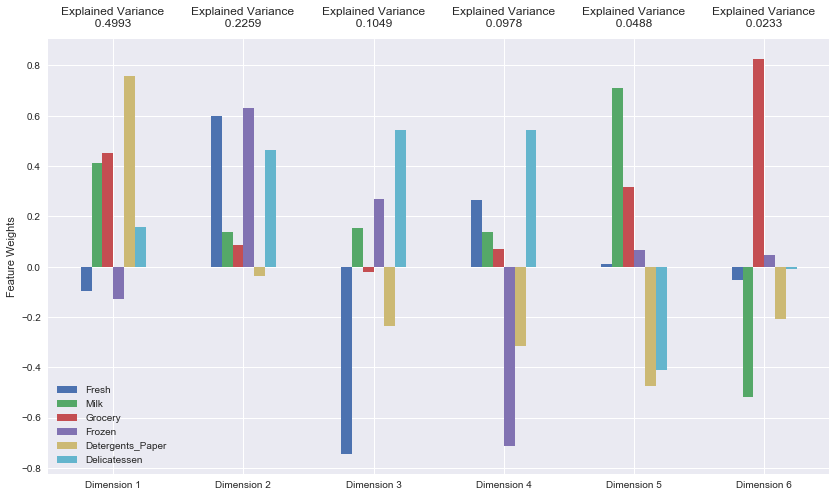

PCA result for good data  -> 


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


Sum of first 2 principal components/PC -> +0.7252
Sum of first 4 principal components/PC -> +0.9279


In [19]:
#8-------------
from sklearn.decomposition import PCA
from time import time

# Apply PCA by fitting the good data with the same number of dimensions as features
print ( 'Extracting the top {} features from {} data points'.format(good_data_colsize,  good_data.shape[0]))
pca = PCA(n_components= good_data_colsize, svd_solver='auto')
pca.fit( good_data )
if debug: print ( ' Explained variance ratio={}'.format( np.round(pca.explained_variance_ratio_, 4)))

# Transform log_samples using the PCA fit above
pca_samples = pca.transform( log_samples )

# Generate PCA results plot
print( 'PCA result plot for good data  -> ')
pca_results = vs.pca_results(good_data, pca)
plt.show()
print( 'PCA result for good data  -> ')
display(pca_results)
plt.close()

# summarize explained variance of first few principal components
print( 'Sum of first 2 principal components/PC -> +{:0.4f}'.format( sum( pca_results[0:2]['Explained Variance'] )))
print( 'Sum of first 4 principal components/PC -> +{:0.4f}'.format( sum( pca_results[0:4]['Explained Variance'] )))

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

>**Answer:**
The PCA explained variance ratio were 0.4993, 0.2259, 0.1049, 0.0978, 0.0488, 0.0233 of the variance of the data
- First two 0.4993 + 0.2259 = 0.7252 approx. 0.73% in total  
- First four 0.4993 + 0.2259 + 0.1049 + 0.0978 = 0.9279  approx. 0.93% in total

>Observed the PCA matrix, looked for the results with respect to the values that we had deemed significant.  I bolded the correlation value above 0.5, interpreted they were important, strong, even the most strongly correlated with the dimension.

>| Dimension | positive features | increased weights | negative features | decreased weights | best represent |  
| -- | :------: | :--: | :--: | ---- | :---: |  
| 1 | Detergent Paper > Grocery > Milk | <b>0.76</b> > 0.45 > 0.41 | Frozen < Fresh | -0.13 < -0.1 | Retailer: grocery/household store |  
| 2 | Frozen > Fresh > Deli | <b>0.63</b> > <b>0.6</b> > 0.46 | Detergent Paper | -0.04 | Restaurant |  
| 3 | Deli > Frozen > Milk | <b>0.54</b> > 0.27 > 0.15 | Fresh < Detergent Paper | <b>-0.75</b> < -0.24 | Food market selling deli/frozen, less fresh |
| 4 | Deli > Fresh > Milk | <b>0.54</b> > 0.27 > 0.13 | Frozen < Detergent Paper | <b>-0.71</b> < -0.32 | Deli restaurant selling deli/fresh, less frozen | 

>Observed the PCA visualization, I interpreted the Principal Component/PC result deem significant if the value above 0.5 
- 1st PC: Dimension 1 had strongly/significantly correlated with Detergent Paper whose bar above 0.5.  The PC increased 
    - With an increase of Detergent Paper in the rate of increase ~0.76, increasing Grocery with 0.45, and increasing Milk with 0.4
    - With decreasing Frozen and decreasing Fresh close to rate of -0.1
    - This best represent the retailer (i.e. Target, Bartel, RiteAid) store would tend to sell lots of detergent paper, some grocery/milk, less frozen/fresh.
- 2nd PC: Dimension 2 had strongly/significantly correlated with Frozen and Fresh above 0.5.  The PC increased 
    - With an increase of Frozen and Fresh in the rate of increase ~0.6, increasing Deli with 0.45
    - With decreasing Detergent Paper close to rate of -0.04
    - This best represent the restaurant would tend to sell lots of frozen/fresh, some Deli
- 3rd d PC: Dimension 3 had strongly/significantly correlated with increasing Deli and decreasing Fresh.  The PC increased 
    - With an increase of Deli in the rate of increase ~0.54, some increasing Frozen/Milk with 0.27/0.15
    - With significantly decreasing fresh with -0.75, less Detergent Paper -0.24
    - This best represent the specialty of Food Market tends to sell deli, some frozen/milk, the least Fresh.
- 4th d PC: Dimension 4 had strongly/significantly correlated with increasing Deli and decreasing Frozen.  The PC increased 
    - With an increase of Deli in the rate of increase ~0.54, some increasing Frozen/Milk with 0.27/0.15
    - With significantly decreasing frozen with -0.71, less detergent paper -0.32
    - This best represent the Deli restaurant/store (i.e. subway) tends to sell deli, some fresh/milk, less/least Frozen.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8331,-3.8531,-1.8577,-2.5293,4.0202,0.8180
1,-1.6122,2.1380,0.6971,-0.3258,-1.0268,0.4912
2,-1.9824,0.6177,0.3769,0.5887,-0.2576,-0.1144


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
#9-------------
# Apply PCA by fitting the good data with only two dimensions
data_colsize=2

print ( 'Good data ->{}'.format(good_data.shape))
display(good_data.head(5))

print ( ' Extracting the top {} features from {} data points'.format(data_colsize,  good_data.shape[0]))
pca = PCA(n_components= data_colsize , svd_solver='auto' )
pca.fit( good_data )
print ( '   Explained variance ratio={}'.format( np.round(pca.explained_variance_ratio_, 4)))

print( 'Transform good data to reduced data ->')
# Transform the good data using the PCA fit above
reduced_data = pca.transform( good_data )
display(reduced_data[:5])

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples )

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print( 'Reduced_data.shape -> {}'.format(reduced_data.shape))
display(reduced_data.head(5))

Good data ->(398, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


 Extracting the top 2 features from 398 data points
   Explained variance ratio=[ 0.4993  0.2259]
Transform good data to reduced data ->


array([[ 1.77932162, -0.66044942],
       [ 1.88203402,  0.46174133],
       [ 1.99350697,  1.24707995],
       [-0.99858135,  1.36936442],
       [ 0.99384653,  2.07831377]])

Reduced_data.shape -> (398, 2)


,Dimension 1,Dimension 2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
#10-------------
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8331,-3.8531
1,-1.6122,2.1380
2,-1.9824,0.6177


## 4. Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

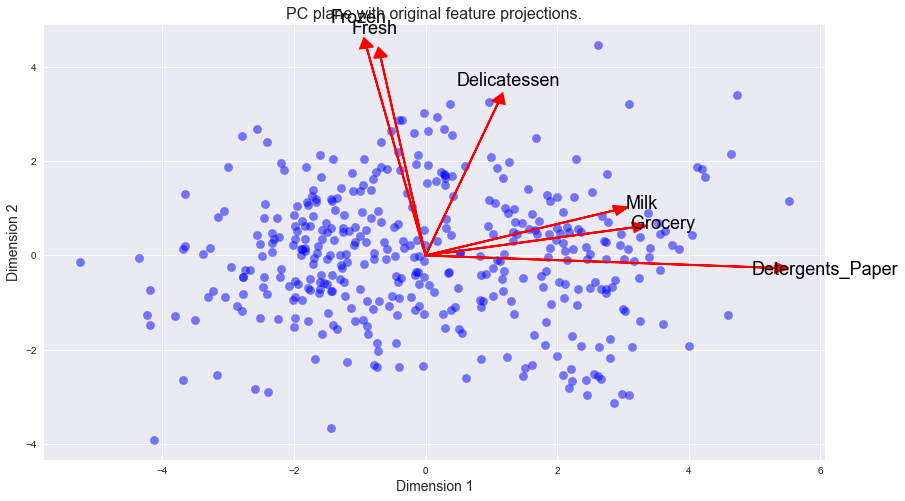

In [23]:
#11-------------
# Create a biplot
vs.biplot(good_data, reduced_data, pca)
plt.show()
plt.close()

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

>**Answer:**  
Observed from the visual representation, 
- 1st Component: the detergents paper vector had positive correlated (orthogonal angle less than 90 degree) with milk, grocery and deli vectors, but negatively correlated (angle greater than 90 degree) with fresh and frozen vectors
    - Red arrow shown the original feature Detergent Paper projection vector in the direction (with a positive correlation) with milk, grocery and deli projection vectors in dimension 1; and of 2nd component along decreasing values of detergent paper, increasing values of milk, grocery and deli in dimension 2
    - Red arrow shown fresh & frozen projection vectors in the direction with a negative correlation in dimension 1; and of 2nd component along increasing values of fresh and frozen in dimension 2

> Above observations agreed with the pca_results plot I obtained earlier
pca_result plot shown 
- 1st component: 
    - Positive/increasing milk, grocery, detergent paper, deli
    - Negative/decreasing fresh, frozen
- 2nd component: 
    - Positive/increasing fresh milk, grocery, frozen, deli
    - Negative/decreasing detergent paper

## 5. Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

Hint: Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

>**Answer:**  
>K-Means clustering algorithm: hard assign a data point to the closest cluster on convergence; point belong explicitly to clusters.  Advantage:  
- Faster and support a large number of features/variables if K is small
- Simple just iterate running "k" times, easy to understand, quicker to train
- produce lighter clusters if clusters are globular, where all members of each cluster are in close proximity to each other
    - Pre-clustering, reducing space into disjoint smaller sub-spaces where other clustering algorithms can be applied
- Suitable when cluster has the same variance and each feature is independent of other feature
    - give best result when data set are distinct or well separate from each other.  

>Gaussian Mixture Model/GMM clustering algorithm: soft assign a data point with probability for each cluster indicating how likely it belongs to the cluster.  Advantage:
- More scalable, flexible because cluster had unconstrained covariance.
    - K-Means could be simpler version of GMM with equal covariance per component.
- fit more complex cluster shapes; more flexible with different distribution of data

>The wholesale customer dataset was small, contained mixture models in dataset, so GMM is more suitable.

>Note: I used the following references and cited for advantage above
- [Clustering comparison](http://scikit-learn.org/stable/modules/clustering.html)
- [Gaussian mixture models in learn scikit](http://scikit-learn.org/stable/modules/mixture.html#gmm)
- [K-Means Clustering Overview](http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm)
- [Mixture model](https://en.wikipedia.org/wiki/Mixture_model)
- [Clustering comparison](http://scikit-learn.org/stable/modules/clustering.html)
- [Gaussian Mixture Models](http://scikit-learn.org/stable/modules/mixture.html#mixture)


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [24]:
#12-------------
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

n_clusterer=2

print( 'GMM method ->')
for n_clusterer in range(2, min(10, len(reduced_data) )) :

    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_clusterer, covariance_type='full', random_state= 9)
    clusterer.fit(reduced_data ) 

    # Predict the cluster for each data point
    preds = clusterer.predict( reduced_data )
    if debug: print(preds)
    
    # Find the cluster centers
    centers = clusterer.means_
    if debug: print(centers)
        
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict( pca_samples )
    if debug: print(pca_samples)
        
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print ( "For n_clusters = {}. The average silhouette_score is : {:0.4f}".format(n_clusterer, score))


GMM method ->
For n_clusters = 2. The average silhouette_score is : 0.4474
For n_clusters = 3. The average silhouette_score is : 0.3593
For n_clusters = 4. The average silhouette_score is : 0.3135
For n_clusters = 5. The average silhouette_score is : 0.2785
For n_clusters = 6. The average silhouette_score is : 0.3168
For n_clusters = 7. The average silhouette_score is : 0.3268
For n_clusters = 8. The average silhouette_score is : 0.3171
For n_clusters = 9. The average silhouette_score is : 0.3472


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

>**Answer:**
- I was looking for the highest 'mean silhouette coefficient' score the better.  
    - if value of 0, it indicated it was at the boundary of the distance between the two cluster; overlapping clusters -> least preferred
    - if value of -1, it indicated that the point was close to its neighboring cluster than to the cluster its assigned; a sample has been assigned to the wrong cluster, as a different cluster was more similar; misclassified
    - if positive value close to 1, the best value; it indicated the sample was far away from its neighboring cluster and very close to the cluster its assigned; well matched to its own cluster; well-clustered -> ideal preferred

>I tempted **GMM method** trying cluster numbers range 2 to 9, thus, I observed GMM method had better mean of silhouette coefficient when cluster number was 2.

| Number of clusters | Mean/average silhouette score | if Highest? |
| -- | -- | -- |
|2 | 0.4474 | Yes |
|3| 0.3593 | No |
| 4|0.3135 | No |
| 5| 0.2785 | No |
| 6| 0.3168 | No |
| 7| 0.3268 | No |
|8| 0.3171 | No |
|9| 0.3472 | No |

>- The more clusters (i.e. 4-9), scores seem decreased and between ~0.35 and ~0.28
- When cluster number was 2, I observed the Highest Silhouette score 0.45 
- Therefore, I chose '2' clusters to classify the data, so I could gain the best silhouette score.
 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

GMM - Chose n_clusters = 2 as optimal number of clusters. The average silhouette_score is : 0.4474


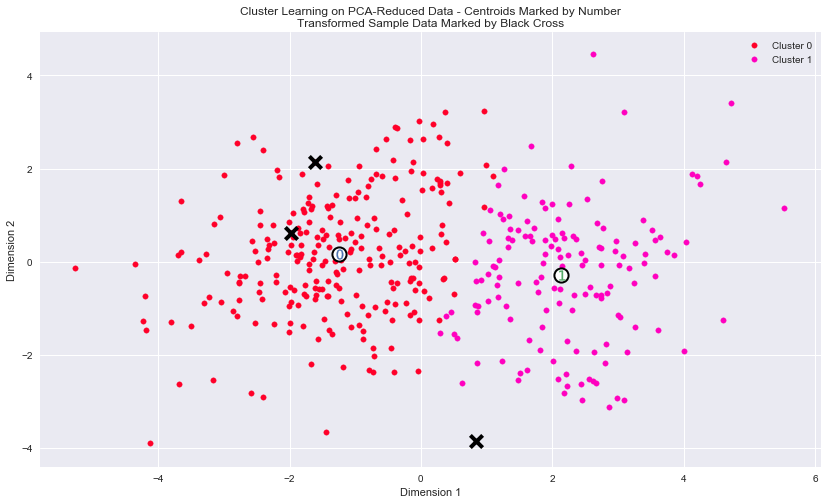

In [25]:
#13-------------
def visualize_cluster( n_clusterer=2 ) :
    '''
    inputs: number of clusters
    To dispaly result of clustering using GMM method
    output: none
    '''    
    clusterer = GMM(n_components=n_clusterer, covariance_type='full', random_state= 9)
    clusterer.fit(reduced_data ) 
    preds = clusterer.predict( reduced_data )    # Predict the cluster for each data point
    centers = clusterer.means_    # Find the cluster centers
    sample_preds = clusterer.predict( pca_samples )  # Predict the cluster for each transformed sample data point
    score = silhouette_score(reduced_data, preds)
    print ( "GMM - Chose n_clusters = {} as optimal number of clusters. The average silhouette_score is : {:0.4f}".format(
        n_clusterer, score))

    # Display the results of the clustering from implementation 
    vs.cluster_results(reduced_data, preds, centers, pca_samples)
    plt.show()
    plt.close()
    return 
    
#experiment various numbers of cluseters
if debug: 
    visualize_cluster(6)
    visualize_cluster(3)

# After experiment, Chose 2 as my optimal number of clusters
n_clusterer=2
visualize_cluster( n_clusterer )

clusterer = GMM(n_components=n_clusterer, covariance_type='full', random_state= 9)
clusterer.fit(reduced_data ) 
preds = clusterer.predict( reduced_data )    # Predict the cluster for each data point
centers = clusterer.means_    # Find the cluster centers
sample_preds = clusterer.predict( pca_samples )  # Predict the cluster for each transformed sample data point
score = silhouette_score(reduced_data, preds)


>GMM showed the soft-assignment, data points on the left side was cluster 0, right side was cluster 1.  

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
#14-------------
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)
print( 'log_centers-> {}'.format(log_centers))

# Exponentiate the centers
true_centers = np.exp( log_centers )

# Display the true centers
print( '\ntrue_centers -> ')
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

percentile_result = {}
for idx, featname in enumerate(true_centers): 
    rowrs={}
    for jdx, featval in enumerate( true_centers[featname] ) :
        rowrs[jdx] = np.float(stats.percentileofscore( data[featname], featval ))
    percentile_result[idx] = rowrs

print('--Results of percentile ->')
try :
    for i in range(0, len(percentile_result)-1) :
        print ( '{} = {:.2f}%  {:.2f}%  {:.2f}%  {:.2f}%  {:.2f}%  {:.2f}% '.format( 
            i, percentile_result[0][i],  percentile_result[1][i], percentile_result[2][i] , 
            percentile_result[3][i] , percentile_result[4][i] , percentile_result[5][i] ) ) 
except:
    print ' '

    
print( '--Data Mean=Average & Median=50% percentile -> ')
display( np.round(summary.loc[['mean','50%']],2))
print "--Compared to the mean -> "
display(true_centers - data.mean().round())
print "--Compared to the median/50% -> "
display(true_centers - data.median().round())

log_centers-> [[ 9.15571874  7.63392712  7.87257393  7.69423731  5.83770246  6.68305733]
 [ 8.551415    8.95878876  9.35712669  6.97373422  8.41989885  7.0042194 ]]

true_centers -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9468.0,2067.0,2624.0,2196.0,343.0,799.0
Segment 1,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0


--Results of percentile ->
0 = 54.55%  33.64%  33.18%  59.55%  31.36%  44.55% 
1 = 34.55%  78.41%  78.41%  38.41%  78.86%  55.45% 
 
--Data Mean=Average & Median=50% percentile -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.3,5796.27,7951.28,3071.93,2881.49,1524.87
50%,8504.0,3627.00,4755.50,1526.00,816.50,965.50


--Compared to the mean -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2532.0,-3729.0,-5327.0,-876.0,-2538.0,-726.0
Segment 1,-6826.0,1980.0,3630.0,-2004.0,1655.0,-424.0


--Compared to the median/50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,964.0,-1560.0,-2132.0,670.0,-473.0,-167.0
Segment 1,-3330.0,4149.0,6825.0,-458.0,3720.0,135.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.  Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

>**Answer:**
Inverse method causing opposite spending patterns:
- Segment 0: this cluster could be restaurant, food shop such as food truck, catering service selling selected food items.
    - The most spent were Fresh and Frozen.  
    - All features were below mean/average spending.
- Segment 1: - This cluster could be retailer like convenient/grocery stores
    - The most spent were Milk and Grocery, and more on Detergent Paper.  
    - Milk, Grocery and Detergent Paper were above mean/average spending

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
#15-------------
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

print('\nSamples->')
display(samples)
print( 'Sample Percentile in % -> ')
display( sample_percentile )
compared_mean_median( samples )


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0

Samples->


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1406,16729,28986,673,836,3
1,16823,928,2743,11559,332,3486
2,11818,1648,1694,2276,169,1647


Sample Percentile in % -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,12.73,94.77,97.27,24.32,51.36,0.57
334,74.77,12.27,34.32,96.36,30.68,92.95
110,63.64,26.82,17.05,61.14,15.23,71.59


--Sample compared to the mean/average -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-10594.0,10933.0,21035.0,-2399.0,-2045.0,-1522.0
1,4823.0,-4868.0,-5208.0,8487.0,-2549.0,1961.0
2,-182.0,-4148.0,-6257.0,-796.0,-2712.0,122.0


--Sample compared to the median/50% -> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-7098.0,13102.0,24230.0,-853.0,20.0,-963.0
1,8319.0,-2699.0,-2013.0,10033.0,-484.0,2520.0
2,3314.0,-1979.0,-3062.0,750.0,-647.0,681.0


>**Answer:**
- 1st sample point 0: the most spent on Milk, Grocery and Detergent.  Milk and grocery above mean/average
    - My prediction was cluster 1 referring Segment 1 cluster could be retailer like convenient/grocery stores
    - My earlier guess was grocery store, or restaurants selling bakery/cake/fresh made catering service
    - The prediction was ** consistent** with clustering segment 
- 2nd sample point 1: the most spent on Frozen, Deli and Fresh.  Fresh and frozen above mean/average
    - My prediction was cluster 0 referring Segment 0 cluster could be small business like food truck or small fast-food shop selling selected food items.
    - My earlier guess was food stores selling ready-to-cook/bake like organic refrigerated frozen foods, ready-to-eat like fresh deli, salad, cold-cut meat (i.e. chicken, turkey/ham etc.)
    - The prediction was ** consistent** with clustering segment 
- 3rd sample point 2: the most spend on Deli, Frozen and Fresh.  Deli above mean/average
    - My prediction was cluster 0 referring Segment 0 cluster could be small business like food truck or small fast-food shop selling selected food items.
    - My earlier guess was the fast-food shop selling counter-serve/made-to-order toasted sandwiches, salads & baked goods
    - The prediction was ** consistent** with clustering segment

## 6. Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

*How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

>**Answer:**
In assumption of the change affects all customers equally, I would conduct A/B tests to assist my determination.

>I could consider to split customers into my optimal number of cluster: two group evenly 
- Cluster Segment 0: if customers would buy less than average quantity for fresh, frozen items, they belong to segment 0
    - No change on delivery frequency (5 days a week).  We could consider to use smaller trucks to deliver items.  
    - Customers could ordered smaller amount because items could be perishable goods, likely went bad quickly
    - Higher chance that customers react positive if customers could keep their inventory low to save cost  
- Cluster Segment 1: if customers would buy larger than average quality for milk, grocery and detergent paper, they belong to segment 1
    - Customers could regularly order in bulk, larger quantity
    - If changing delivery frequency to 3 days a week
    - Higher chance that customers react positive if they would have larger storage spaces; negative if they had limited spaces, or had high inventory cost

>(1) Determine the needed sample size ahead of time, and make sure having at least many in the experiment
- Take 2 random samples as sub-groups (a or b) from each segment as experiencing groups
    + a as control group - current delivery frequency
    + b as experiment group - enhancing delivery frequency
- Test two versions of delivery frequency in a week 
    - Version 0: Original/BAU delivery frequency 5 days a week 
    - Version 1: New delivery frequency - Reduce delivery frequency to 3 days a week  

>(2) Ensure to have enough representativeness in my samples  
>(3) Test should be run for a considerable amount of time.  Plan to run it full weeks at a time, at least 2 business cycles
    
>| cluster segment | sample group | delivery frequency | note | 
| :-- | :-- | :-- | :-- |
| 0 | a - control | version 0 | no change frequency | 
| 0 | b - experiment | version 1 | new frequency |
| 1 | a - control| version 0 | no change frequency |  
| 1 | b - experiment | version 1 | new frequency |  

>(4) Take satisfaction survey
- Positive if satisfied.  This could result in increasing orders or quantity, or less complaints
- Negative if not satisfied.  This could cause decreasing orders or quantity, or more calls/emails to complain

>(5) Compare survey result 
- Look at statistical significance (p-values 95% or higher) - if the probability to beat the original variation by >5%
- Look for conversion range - margin of error which willingly to accept 

>Once Test result become significant affected, meaning that cluster customers respond positively.  Recommend to roll out this schedule change to the remaining customers in the cluster. 

>*Note: Always perform A/B Testing if there is probability to beat the original variation by >5%.*


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

>**Answer:**  
Few ways to classify new customers to a customer segment:
- If using one of unsupervised clustering algorithms like GMMs and K-Means, it would include new data points, and identify cluster number as new customers' segments.  
- If using one of supervised learning algorithms such as 
    - Gaussian Naive Bayes (GaussianNB), Decision Trees, Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting), K-Nearest Neighbors (KNeighbors), Stochastic Gradient Descent Classifier (SGDC), Support Vector Machines (SVM), Logistic Regression etc., 
    - it could train/learn the original/existing customers and included labeling 'customer segment' as target variable.  
    - Then, this model could be used to predict the target variable for new customers' segments. 
    - Target variable could be customer's segment


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

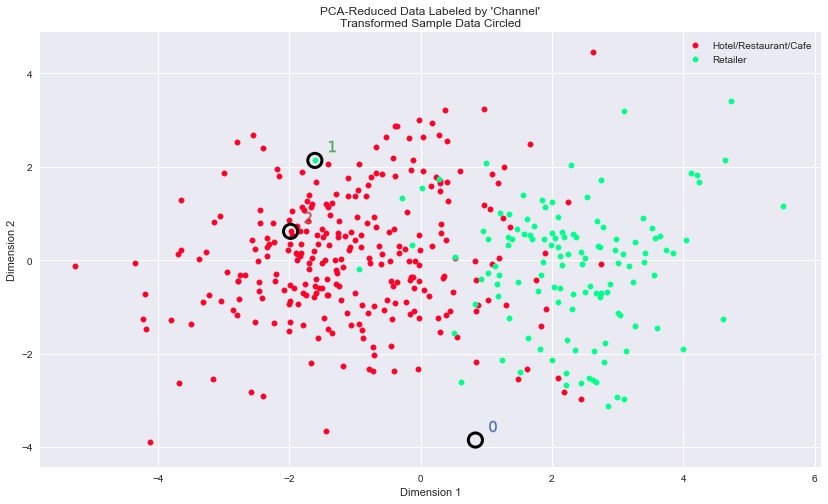

In [28]:
#16-------------
if debug: print('Clustering Location Index-> {}'.format(outliers))
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

> **Answer:**  
- I've chosen the highest silhouette coefficient score previously for my best number of cluster for un-labelled dataset.  This cluster number was 2, which was matched to the two underlying distributions: (1) Hotel/Restaurant/Cafe and (2) Retailer.  
- I would consider these classifications as consistent with my previous definition of the customer segment.
    - Left side was Cluster segment 0 -> Hotels/Restaurants/Cafes
    - Right side was Cluster segment 1 -> Retailer - markets

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Reference:  
- [Machine Learning Engineer Nanodegree Program via udacity.com](https://classroom.udacity.com/nanodegrees/nd009)
- [A/B Testing - Overview](https://www.tutorialspoint.com/ab_testing/ab_testing_overview.htm)
- [A/B Testing](http://20bits.com/article/an-introduction-to-ab-testing)
- [A/B tests](https://en.wikipedia.org/wiki/A/B_testing)
- [Clustering comparison](http://scikit-learn.org/stable/modules/clustering.html)
- [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
- [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
- [Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)
- [Decision Tree Regression](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)
- [Decision Tree](http://scikit-learn.org/stable/modules/tree.html)
- [Gaussian mixture models in learn scikit](http://scikit-learn.org/stable/modules/mixture.html#gmm)
- [Gaussian Mixture Models](http://scikit-learn.org/stable/modules/mixture.html#mixture)
- [Implementing a Principal Component Analysis (PCA)](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)
- [Interpretation of the Principal Components](https://onlinecourses.science.psu.edu/stat505/node/54)
- [K-Means Clustering Overview](http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm)
- [Making sense of principal component analysis, eigenvectors & eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
- [Mixture model](https://en.wikipedia.org/wiki/Mixture_model)
- [ML Foundations, Evaluation Metrics, Regression Metrics](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/0d81ce82-2135-4dfe-9f2a-2b1b57ac09d7)
- [Model Evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)  
- [panda dataframe plot cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting)
- [Principal component analysis](http://www.nonlinear.com/support/progenesis/lc-ms/faq/v4.1/pca.aspx)
- [Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) 
- [R square negative](https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative)  
- [Supervised and Unsupervised Machine Learning Algorithms](http://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/)
- [Unsupervised Learning via audacity ML Engineer nanodegree program](https://classroom.udacity.com/nanodegrees/nd009/parts/5375cf82-14fe-422d-b737-7bc893e20a6d)  
- [Visualize Machine Learning Data in Python With Pandas](http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)
